#### Аналитика HH.ru

**Цель исследования:**
1. Анализ текущего состояния рынка труда для профессий "Дата-аналитик" и "Дата-сайентист".
2. Разработка рекомендаций для соискателей.

**Ход исследования:**

Данные о вакансиях получим из следующих фалов:

- Данные о вакансиях "Дата-аналитик" содержатся в файле 'vacancies_da.xlsx'.
- Данные о вакансиях "Дата-сайентист" содержатся в файле 'vacancies_ds.xlsx'.

Вначале необходимо изучить данные и выполните предобработку.

Этапы исследования:
- Обзор данных;
- Предобработка данных;
- Исследовательский анализ данных;
- Выявление грейда требуемых специалистов;
- Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий;
- Определение типичного места работы;
- Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.
- Определение наиболее желаемых кандидатов 
- Расчет помесячной динамики количества вакансий;
- Формулирование выводов и рекомендаций.



### 1. Загрузка данных и подготовка их к анализу

Описание полей в данных:
- id - Уникальный идентификатор вакансии.
- name - Название вакансии.
- published_at - Дата публикации.
- alternate_url - Ссылка на вакансию.
- type - Статус вакансии на момент получения данных от api и передачи
их в базу.
- employer - Работодатель.
- department - Работодатель, отдел.
- area - Регион места работы.
- experience - Требуемый опыт работы.
- key_skills - Ключевые навыки, в том числе найденные при анализе
полного текста вакансии. Поле генерируется после получения
информации от api.
- schedule - График работы.
- employment - Тип занятости.
- description - Описание вакансии.
- description_lemmatized - Лемматизированное описание вакансии.
- salary_from - Нижняя граница предлагаемой заработной платы.
- salary_to - Верхняя граница предлагаемой заработной платы.
- salary_bin - Категория зарплаты.
- key_skills_from_key_skills_field - Ключевые навыки из поля вакансии
key_skills.
- hard_skills_from_description - “Твердые” навыки, найденные при
обработке полей с навыками. Поле генерируется после получения
информации от api. soft_skills_from_description - “Мягкие” навыки,
найденные при обработке полей с навыками. Поле генерируется после
получения информации от api.

In [98]:
# загружаем библиотеки

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

In [99]:
# Загружаем данные из Excel файла с вакансиями для Data Analyst
vacancies_da = pd.read_excel(r'C:\Users\kirillskvort\YandexDisk\laptop python files\project_hh_ru\vacancies_da.xlsx')
# Загружаем данные из Excel файла с вакансиями для Data Scientist
vacancies_ds = pd.read_excel(r'C:\Users\kirillskvort\YandexDisk\laptop python files\project_hh_ru\vacancies_ds.xlsx')

In [100]:
# посмотрим на структуру данных
vacancies_da.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN


In [101]:
# посмотрим на структуру данных
vacancies_ds.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100049339,Стажер Data Science (Новосибирск),2024-05-24 10:44:01,https://hh.ru/vacancy/100049339,Открытая,СБЕР,Сбер для экспертов,Новосибирск,Junior (no experince),[],Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
1,100051447,Data Scientist,2024-05-24 10:58:18,https://hh.ru/vacancy/100051447,Открытая,Бюро кредитных историй Скоринг Бюро,NaN,Москва,Junior+ (1-3 years),"['Python', 'Hadoop', 'Machine Learning', 'Рабо...",Удаленная работа,Полная занятость,бюро кредитных историй «скоринг бюро» является...,бюро кредитный история скоринг бюро являться к...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Big Data, Python, Spark, Hadoop, ...",Pandas,"Документация, Аналитическое мышление"
2,100070495,ML Engineer / Data Scientist,2024-05-24 13:15:26,https://hh.ru/vacancy/100070495,Открытая,ГК ФСК,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'Machine Learning', 'Doc...",Полный день,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,NaN,NaN,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,...",NaN,NaN


In [102]:
# Выводим информацию о DataFrame с вакансиями Data Analyst
vacancies_da.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

DataFrame vacancies_da:
- Общее количество записей - 1801 
- 19 столбцов
- Типы данных:
   - id - числовой тип данных int64.
   - name, alternate_url, type, employer, area, experience, key_skills, schedule, employment, description, description_lemmatized, salary_bin, key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description - тип данных object (строка).
   - published_at - тип данных datetime64[ns].
   - salary_from и salary_to - тип данных float64 (вещественные числа).
- Столбцы salary_from и salary_to содержат много пропусков (только 348 и 228 непустых значений соответственно)
- Столбец key_skills_from_key_skills_field заполнен не полностью: 1093 непустых значений.
- Столбцы hard_skills_from_description и soft_skills_from_description также имеют значительное количество пропусков: 418 и 588 непустых значений соответственно.

In [103]:
#посмотрим на поле department
vacancies_da['department'].unique()

array([nan, 'X5 GROUP, Центральный офис', 'билайн: ИТ, Data, Digital',
       'Сбер для экспертов', '«МТС» ', 'Ozon Офис и Коммерция',
       'Северсталь. IT & Digital',
       'Гринатом. Многофункциональный Центр Обслуживания. Закупки и логистика',
       'Яндекс.Маркет', 'Сбер. IT', 'ГК Иннотех | Финтех (Иннотех)',
       'Яндекс', 'ГК Иннотех | Интеграция Консалтинг', 'VK',
       'Сбер. Data Science', 'ПАО «Промсвязьбанк», ИТ',
       'ПАО «Газпром нефть» ИТ', 'ПАО ВТБ, Технологический блок',
       'Группа компаний «Group4Media», Управляющая компания',
       '«МТС» Кибербезопасность', 'Леруа Мерлен. Центральный офис', 'ИТ',
       'ГК Иннотех | Большие данные', 'ВкусВилл. Офис', 'Rambler&Co',
       'Триколор Вещание и бэк-офис', 'Газпромбанк', 'Ozon Fintech',
       'Лента, федеральная розничная сеть, IT ',
       'Компания «СПОРТМАСТЕР», Sportmaster Lab', '«МТС» КИОН',
       'Московский Кредитный Банк. Профессионалы',
       'ПАО ВТБ, Подразделения Поддержки и Контроля',
     

In [104]:
#Судя по содержимому данное поле содержит перечень департаментов компаний, 
# откуда размещена вакансия. Ввиду того что наш анализировать депортаменты мы не будем, 
# представляется целесообразным убрать это поле.
vacancies_da = vacancies_da.drop(columns=['department'])

In [105]:
# посмотрим, что содержит столбец salary_bin
vacancies_da['salary_bin'].unique()

array(['ЗП не указана', 'От 100 тысяч до 200 тысяч',
       'От 200 тысяч до 300 тысяч', 'Меньше 100 тысяч',
       'Больше 300 тысяч'], dtype=object)

Можем использовать данные этого столбца, чтобы заполнить пропуски в поле salary_from и salary_to

In [106]:
# Функция для заполнения значений в столбце salary_from 
def salary_from(row):
    if pd.isna(row['salary_from']):  # Проверяем, является ли значение в столбце salary_from пустым
        if row['salary_bin'] == 'От 100 тысяч до 200 тысяч':
            return 100000
        elif row['salary_bin'] == 'От 200 тысяч до 300 тысяч':
            return 200000
        elif row['salary_bin'] == 'Больше 300 тысяч':
            return 300000
    return row['salary_from']

# Применяем функцию
vacancies_da['salary_from'] = vacancies_da.apply(salary_from, axis=1)
vacancies_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   area                              1801 non-null   object        
 7   experience                        1801 non-null   object        
 8   key_skills                        1801 non-null   object        
 9   schedule                          1801 non-null   object        
 10  employment                        1801 non-null 

In [107]:
# Функция для заполнения значений в столбце salary_to
def salary_to(row):
    if pd.isna(row['salary_to']):  # Проверяем, является ли значение в столбце salary_to пустым
        if row['salary_bin'] == 'От 100 тысяч до 200 тысяч':
            return 200000
        elif row['salary_bin'] == 'От 200 тысяч до 300 тысяч':
            return 300000
        elif row['salary_bin'] == 'Меньше 100 тысяч':
            return 100000
    return row['salary_from']

# Применяем функцию
vacancies_da['salary_to'] = vacancies_da.apply(salary_to, axis=1)
vacancies_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   area                              1801 non-null   object        
 7   experience                        1801 non-null   object        
 8   key_skills                        1801 non-null   object        
 9   schedule                          1801 non-null   object        
 10  employment                        1801 non-null 

Остальные строки с пустыми значениями удалить не можем, т.к. это приведет к значительному снижению объема данных.

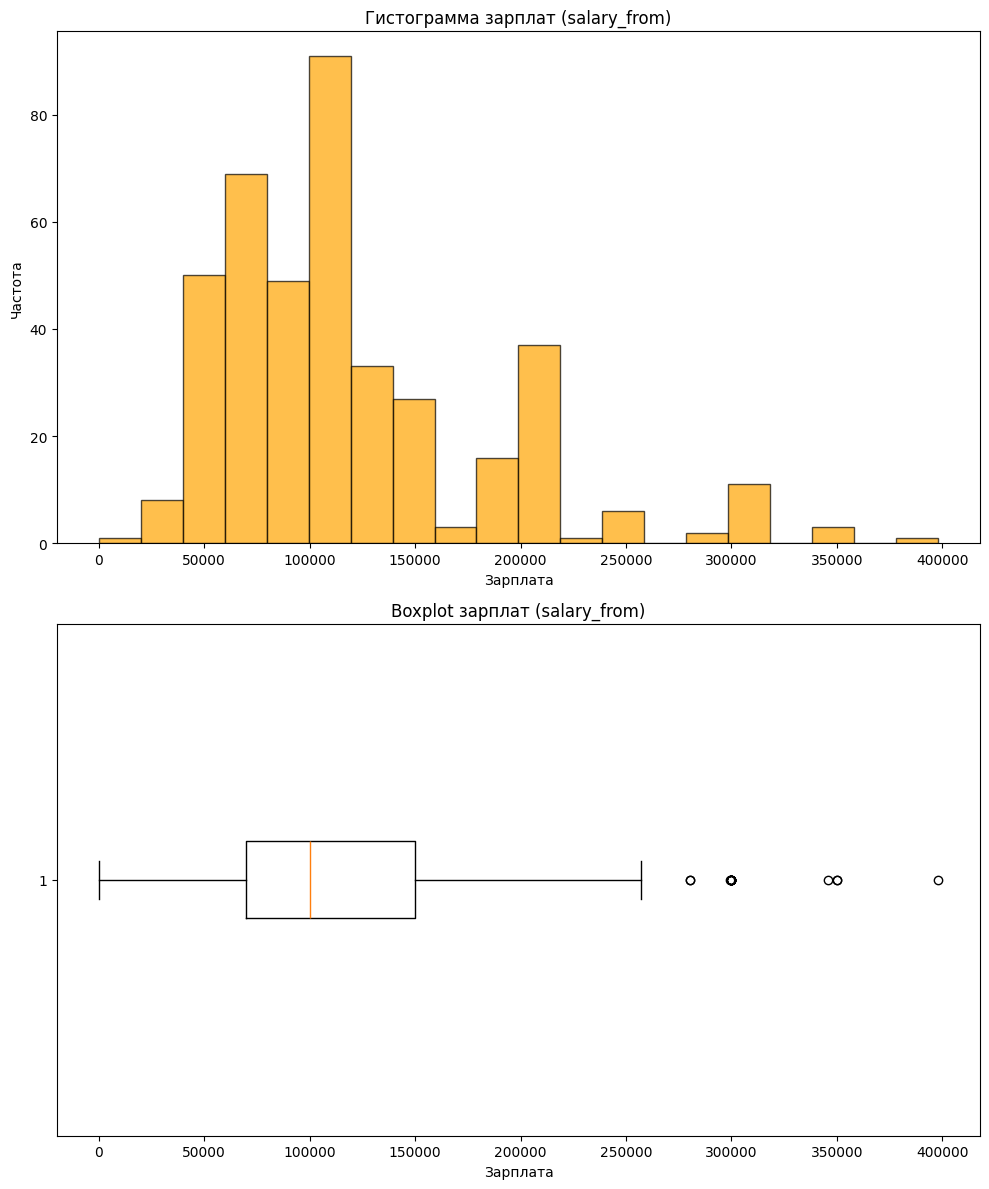

In [108]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Построение гистограммы
axes[0].hist(vacancies_da['salary_from'].dropna(), bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[0].set_title('Гистограмма зарплат (salary_from)')
axes[0].set_xlabel('Зарплата')
axes[0].set_ylabel('Частота')

# Построение ящика с усами
axes[1].boxplot(vacancies_da['salary_from'].dropna(), vert=False)
axes[1].set_title('Boxplot зарплат (salary_from)')
axes[1].set_xlabel('Зарплата')

plt.tight_layout()
plt.show()

В наших данных есть выбросы, но это может обозначать высокий спрос на специалистов опредленного уровня. Плюс у нас небольшой набор данных, поэтому вылеты убирать не будем.

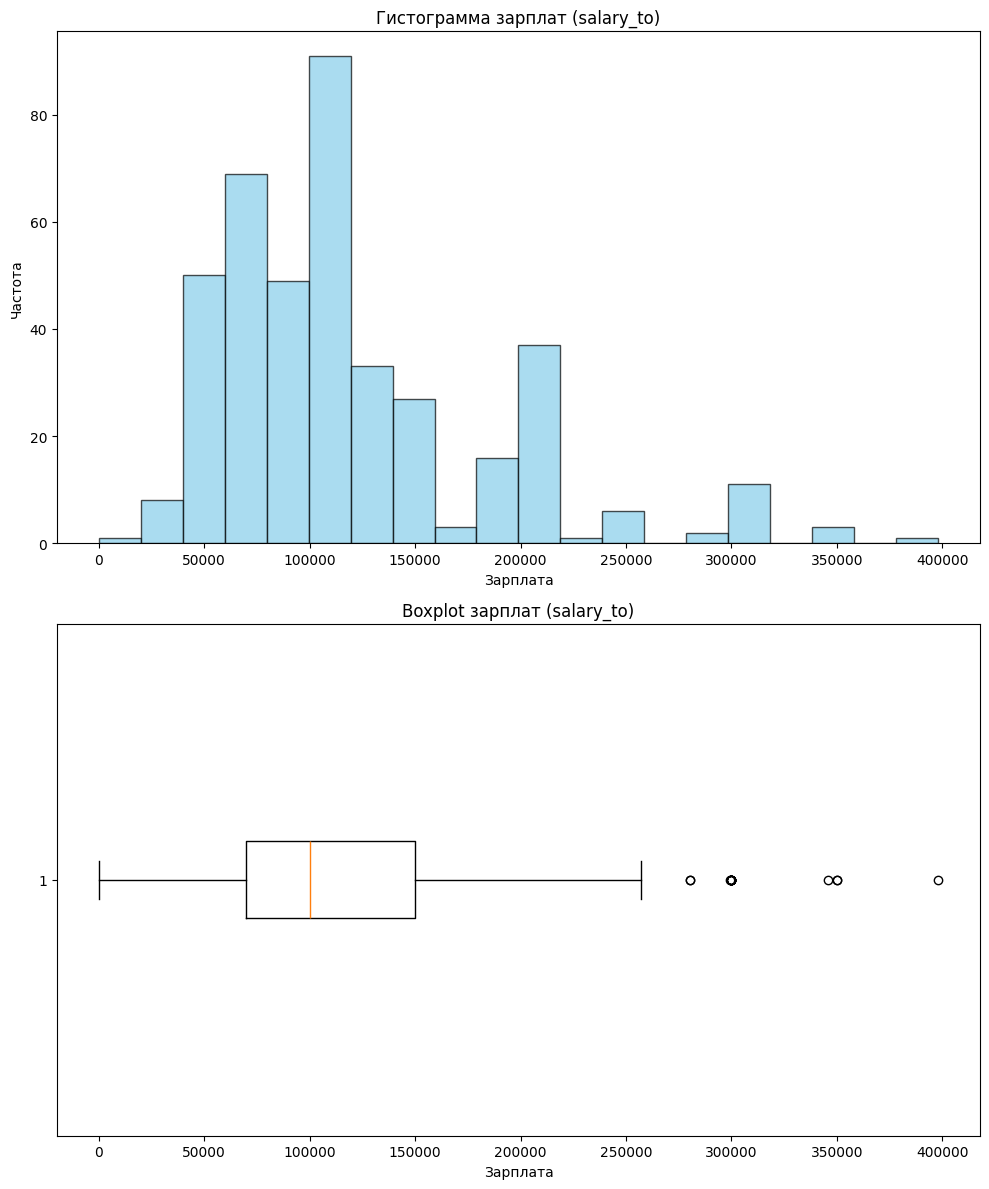

In [109]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Построение гистограммы
axes[0].hist(vacancies_da['salary_to'].dropna(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма зарплат (salary_to)')
axes[0].set_xlabel('Зарплата')
axes[0].set_ylabel('Частота')

# Построение ящика с усами
axes[1].boxplot(vacancies_da['salary_to'].dropna(), vert=False)
axes[1].set_title('Boxplot зарплат (salary_to)')
axes[1].set_xlabel('Зарплата')

plt.tight_layout()
plt.show()

В наших данных есть выбросы, но это может обозначать высокий спрос на специалистов опредленного уровня. Плюс у нас небольшой набор данных, поэтому вылеты убирать не будем.

In [110]:
# ищем явные дубликаты
vacancies_da.duplicated().sum()

0

Явных дубликатов в vacancies_da нет

In [111]:
# Добавим столбцы с месяцев, неделями и днями
vacancies_da['month'] = vacancies_da['published_at'].dt.month
vacancies_da['week'] = vacancies_da['published_at'].dt.isocalendar().week
vacancies_da['day'] = vacancies_da['published_at'].dt.day

In [112]:
# смотрим информацию о dataframe vacancies_ds
vacancies_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     974 non-null    object        
 4   type                              974 non-null    object        
 5   employer                          974 non-null    object        
 6   department                        413 non-null    object        
 7   area                              974 non-null    object        
 8   experience                        974 non-null    object        
 9   key_skills                        974 non-null    object        
 10  schedule                          974 non-null    

- Датафрейм содержит 974 строки и 20 столбцов.
- Типы данных:
   - Целочисленные данные (int64): 1 столбец (id).
   - Вещественные числа (float64): 2 столбца (salary_from, salary_to).
   - Объектные данные (object), по сути строковые: 16 столбцов.
   - Временные данные (datetime64[ns]): 1 столбец (published_at).
- Пропуски:
   - Столбец department заполнен только частично (413 непустых значений из 974).
   - Столбцы salary_from и salary_to содержат много пропусков (только 88 и 82 непустых значений соответственно).
   - Столбцы key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description также содержат пропуски (521, 449 и 294 непустых значений).


In [113]:
# убрал столбец с департаменты от которых размещены вакансии
vacancies_ds = vacancies_ds.drop(columns=['department'])

In [114]:
# посмотрим, что содержит столбец salary_bin
vacancies_ds['salary_bin'].unique()

array(['ЗП не указана', 'Больше 300 тысяч', 'От 200 тысяч до 300 тысяч',
       'Меньше 100 тысяч', 'От 100 тысяч до 200 тысяч'], dtype=object)

Классификация зарплат та же, а значит мы можем использовать функции написанные вышы для заполнения пропусков.

In [115]:
# применяем функции для заполнения пропусков
vacancies_ds['salary_from'] = vacancies_ds.apply(salary_from, axis=1)
vacancies_ds['salary_to'] = vacancies_ds.apply(salary_to, axis=1)
# проверяем результат 
vacancies_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     974 non-null    object        
 4   type                              974 non-null    object        
 5   employer                          974 non-null    object        
 6   area                              974 non-null    object        
 7   experience                        974 non-null    object        
 8   key_skills                        974 non-null    object        
 9   schedule                          974 non-null    object        
 10  employment                        974 non-null    

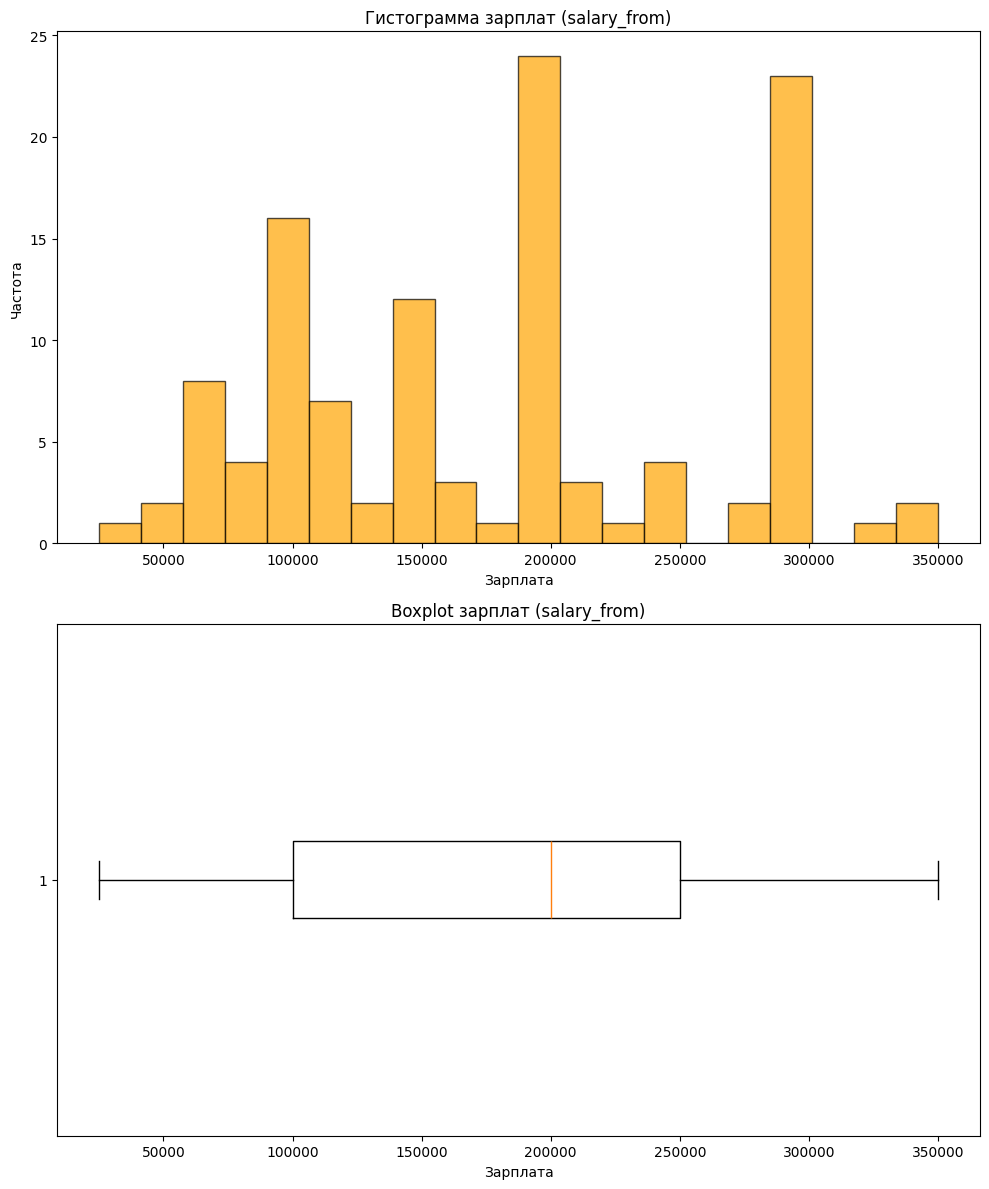

In [116]:
# посмотрим как выглядят данные по зарплатам

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Построение гистограммы
axes[0].hist(vacancies_ds['salary_from'].dropna(), bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[0].set_title('Гистограмма зарплат (salary_from)')
axes[0].set_xlabel('Зарплата')
axes[0].set_ylabel('Частота')

# Построение ящика с усами
axes[1].boxplot(vacancies_ds['salary_from'].dropna(), vert=False)
axes[1].set_title('Boxplot зарплат (salary_from)')
axes[1].set_xlabel('Зарплата')

plt.tight_layout()
plt.show()

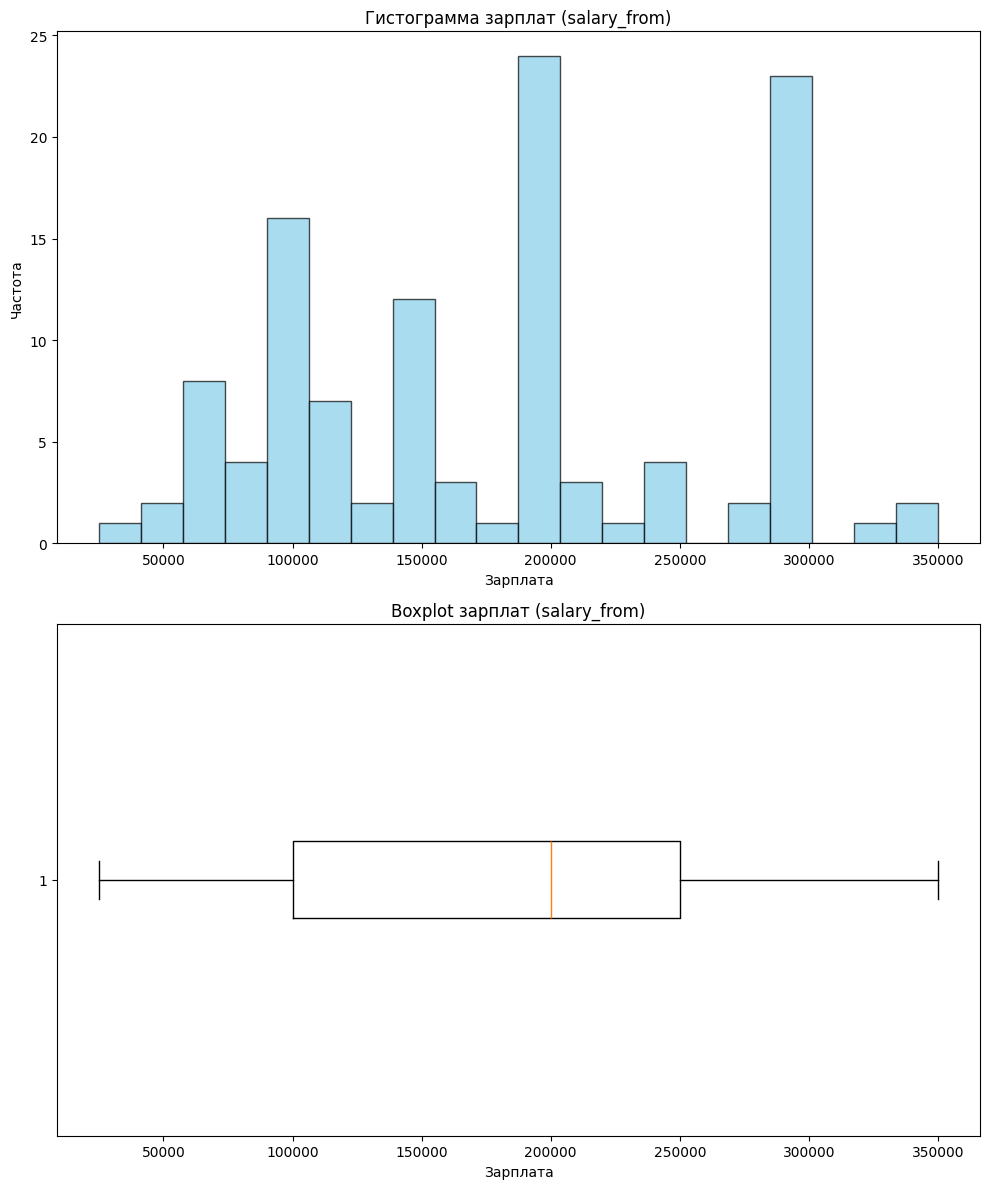

In [117]:
# посмотрим как выглядят данные по зарплатам

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Построение гистограммы
axes[0].hist(vacancies_ds['salary_to'].dropna(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма зарплат (salary_from)')
axes[0].set_xlabel('Зарплата')
axes[0].set_ylabel('Частота')

# Построение ящика с усами
axes[1].boxplot(vacancies_ds['salary_to'].dropna(), vert=False)
axes[1].set_title('Boxplot зарплат (salary_from)')
axes[1].set_xlabel('Зарплата')

plt.tight_layout()
plt.show()

В результате проведённой замены пропусков, мы не обнаружили выбросов. 
Однако 3 диапазона являются наиболее насыщенными с точки зрения распределения данных.


In [118]:
# ищем явные дубликаты
vacancies_ds.duplicated().sum()

0

Явных дубликатов нет

In [119]:
# Добавим столбцы с месяцев, неделями и днями
vacancies_ds['month'] = vacancies_ds['published_at'].dt.month
vacancies_ds['week'] = vacancies_ds['published_at'].dt.isocalendar().week
vacancies_ds['day'] = vacancies_ds['published_at'].dt.day

### 2. Исследовательский анализ данных

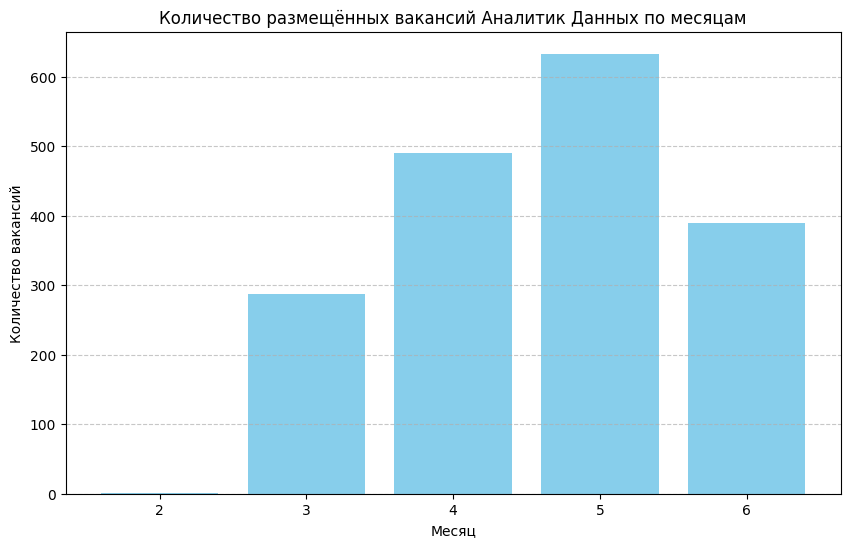

In [120]:
# Сводная таблица: количество размещённых вакансий по месяцам
pivot_month_da = vacancies_da.pivot_table(index='month', values='id', aggfunc='count').reset_index()
pivot_month_da.columns = ['Month', 'Number of Vacancies']

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.bar(pivot_month_da['Month'], pivot_month_da['Number of Vacancies'], color='skyblue')
plt.xlabel('Месяц')
plt.ylabel('Количество вакансий')
plt.title('Количество размещённых вакансий Аналитик Данных по месяцам')
plt.xticks(pivot_month_da['Month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Наибольшее количество вакансий было размещено в мае.

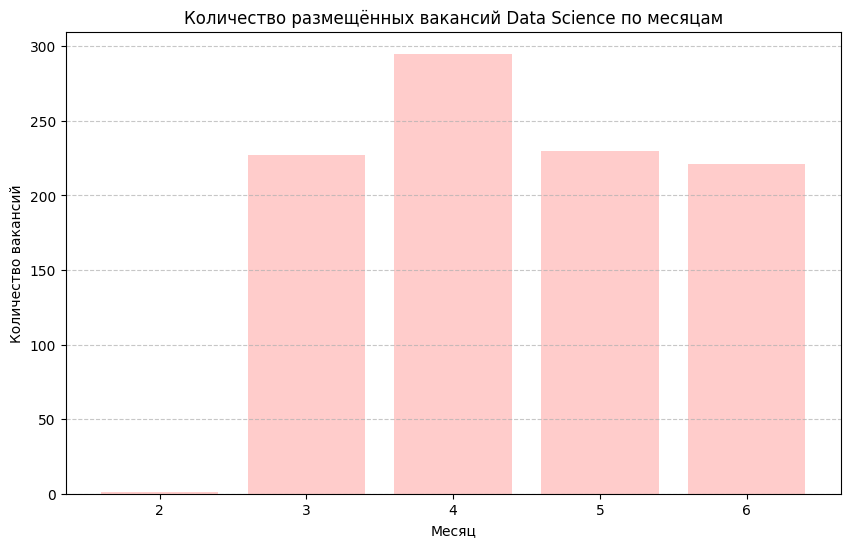

In [121]:
# Сводная таблица: количество размещённых вакансий по месяцам
pivot_month_ds = vacancies_ds.pivot_table(index='month', values='id', aggfunc='count').reset_index()
pivot_month_ds.columns = ['Month', 'Number of Vacancies']

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.bar(pivot_month_ds['Month'], pivot_month_ds['Number of Vacancies'], color='#ffcccb')
plt.xlabel('Месяц')
plt.ylabel('Количество вакансий')
plt.title('Количество размещённых вакансий Data Science по месяцам')
plt.xticks(pivot_month_da['Month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

В марте, мае и июне количество вакансий оставалось примерно на одном уровне.

Апрель выделяется значительно увеличенным числом размещённых вакансий.

### 3. Выявление грейда требуемых специалистов

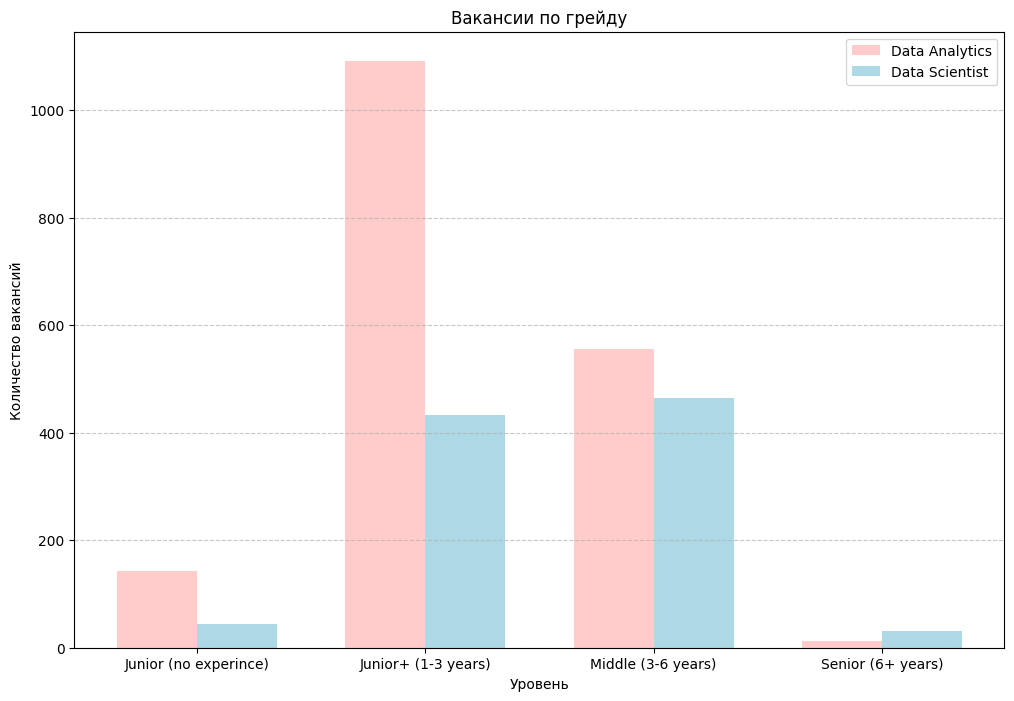

In [122]:
# Сводные таблицы по столбцу experience
pivot_experience_da = vacancies_da.pivot_table(index='experience', values='id', aggfunc='count').reset_index()
pivot_experience_da.columns = ['Experience', 'Vacancies']

pivot_experience_ds = vacancies_ds.pivot_table(index='experience', values='id', aggfunc='count').reset_index()
pivot_experience_ds.columns = ['Experience', 'Vacancies']

# Построение гистограммы 
x = np.arange(len(pivot_experience_da['Experience'])) 
width = 0.35

plt.figure(figsize=(12, 8))
plt.bar(x - width/2, pivot_experience_da['Vacancies'], width, label='Data Analytics', color='#ffcccb')
plt.bar(x + width/2, pivot_experience_ds['Vacancies'], width, label='Data Scientist', color='#add8e6')

plt.xlabel('Уровень')
plt.ylabel('Количество вакансий')
plt.title('Вакансии по грейду')
plt.xticks(x, pivot_experience_da['Experience'])  # установка меток по оси X
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

1. Аналитики данных:
   - Наиболее востребованным уровнем опыта среди аналитиков данных является уровень Junior+. Он опережает другие категории по количеству вакансий.
   - На втором месте по популярности находится уровень Middle.

2. Дата-саентисты:
   - Уровни Junior+ и Middle являются одинаково востребованными.

### 4. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Data Scientist.

In [123]:
# Подсчёт количества вакансий  Аналитик данных по уровням опыта
count_experience_da = vacancies_da['experience'].value_counts()
# Общие количество вакансий 
total_vacancies_da = count_experience_da.sum()
# Подсчёт долей
share_by_experience_da = (count_experience_da / total_vacancies_da) * 100

print("Доли грейдов среди вакансий Аналитиков данных:")
print(share_by_experience_da)

Доли грейдов среди вакансий Аналитиков данных:
experience
Junior+ (1-3 years)      60.577457
Middle (3-6 years)       30.816213
Junior (no experince)     7.884509
Senior (6+ years)         0.721821
Name: count, dtype: float64


In [124]:
# Подсчёт количества вакансий Data Scientist по уровням опыта
count_experience_ds = vacancies_ds['experience'].value_counts()
# Общие количество вакансий 
total_vacancies_ds = count_experience_ds.sum()
# Подсчёт долей
share_by_experience_ds = (count_experience_ds / total_vacancies_ds) * 100

print("Доли грейдов среди вакансий Data Scientist:")
print(share_by_experience_ds)

Доли грейдов среди вакансий Data Scientist:
experience
Middle (3-6 years)       47.741273
Junior+ (1-3 years)      44.455852
Junior (no experince)     4.517454
Senior (6+ years)         3.285421
Name: count, dtype: float64


Среди аналитиков данных Junior+ составлякт - 60%, Middle 30%,  Junior - 7%, Senior меньше процента
Среди Data Scientist Middle составлякт - 47%, Junior+ 44%,  Junior - 4%, Senior - 3%

### 5. Определение типичного места работы для Аналитика данных и Data Scientist

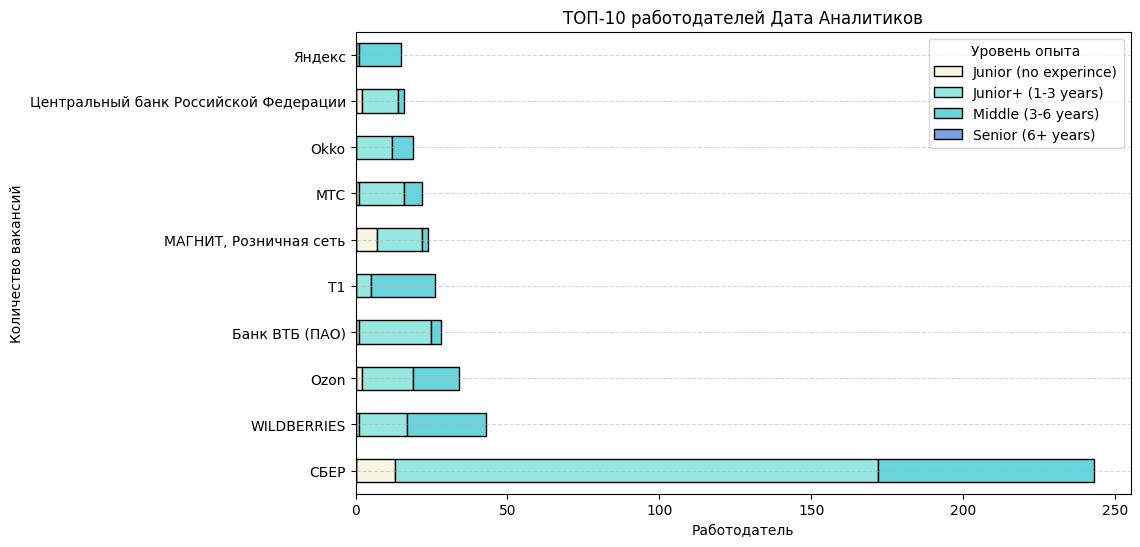

In [125]:
# Подсчёт количества вакансий для каждого работодателя и уровня опыта
pivot_table = vacancies_da.pivot_table(index='employer', columns='experience',
                                    values='id', aggfunc='count', fill_value=0)

# Сортировка ТОП-10 работодателей
employer_vacancy_counts = pivot_table.sum(axis=1).sort_values(ascending=False)
pivot_table = pivot_table.loc[employer_vacancy_counts.index]
top_employers_pivot = pivot_table.head(10)

# Построение гистограммы
top_employers_pivot.plot(kind='barh', stacked=True, figsize=(10, 6),
                         color=['#F8F6E3', '#97E7E1', '#6AD4DD', '#7AA2E3'],
                         edgecolor='black')

# Подписи графика   
plt.xlabel('Работодатель')
plt.ylabel('Количество вакансий')
plt.title('ТОП-10 работодателей Дата Аналитиков')
plt.legend(title='Уровень опыта')
plt.grid(axis='y', linestyle='--', alpha=0.5)

. ТОП работодателей:
   - Сбербанк, Wildberries, Ozon, ВТБ, T1, Магнит, МТС, Okko, ЦБ и Яндекс 
   - Расмотрим Сбербанк подробнее, как самого крпуного работодателя:
     - Наиболее востребованный грейд — Junior+, что указывает на стремление компании привлекать специалистов с начальными умениями и некоторым опытом работы.
     - Следующим по востребованности является уровень Middle, что показывает потребность в специалистах с углублёнными знаниями и опытом.
     - Также присутствует небольшое количество вакансий для сотрудников без опыта, нацеленных на привлечение молодых специалистов и студентов.

3. Компании с преобладанием уровня Middle:
   - Некоторые компании ориентируются преимущественно на специалистов среднего уровня опыта:
     - Яндекс
     - Т1
     - Wildberries
   - Эти организации нуждаются в опыте и знаниях специалистов уровня Middle, что говорит о потребности в сотрудниках, способных сразу приступить к выполнению сложных задач и имеющих за плечами значительный профессиональный опыт.

4. Компании с приоритетом на Junior+:
   - Такие компании, как:
     - Центральный банк
     - МТС
     - Магнит
     - ВТБ
     - Okko
   - в основном ищут специалистов уровня Junior+. Эти компании ориентированы на сотрудников с базовыми навыками и минимальным профессиональным опытом.

Крупные компании, такие как Сбербанк, Wildberries и Ozon, демонстрируют разнообразие в требованиях к уровню опыта, тогда как другие компании, например, Яндекс и Т1, делают ставку на специалистов среднего уровня.

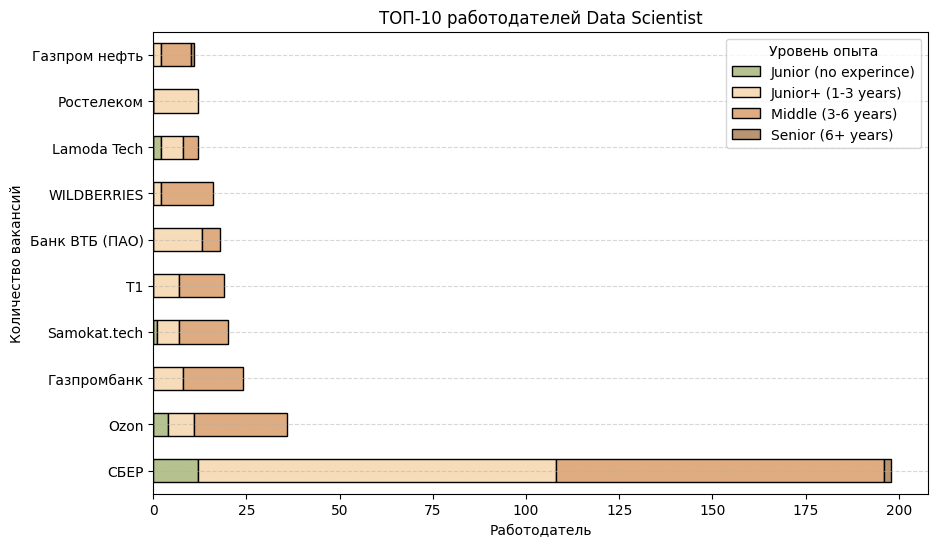

In [126]:
# Подсчёт количества вакансий для каждого работодателя и уровня опыта
pivot_table = vacancies_ds.pivot_table(index='employer', columns='experience',
                                    values='id', aggfunc='count', fill_value=0)

# Сортировка ТОП-10 работодателей
employer_vacancy_counts = pivot_table.sum(axis=1).sort_values(ascending=False)
pivot_table = pivot_table.loc[employer_vacancy_counts.index]
top_employers_pivot = pivot_table.head(10)

# Построение гистограммы
top_employers_pivot.plot(kind='barh', stacked=True, figsize=(10, 6),
                         color=['#B5C18E', '#F7DCB9', '#DEAC80', '#B99470'],
                         edgecolor='black')

# Подписи графика   
plt.xlabel('Работодатель')
plt.ylabel('Количество вакансий')
plt.title('ТОП-10 работодателей Data Scientist')
plt.legend(title='Уровень опыта')
plt.grid(axis='y', linestyle='--', alpha=0.5)

- Сбербанк занимает первое место, привлекая наибольшее количество вакансий.
- Приоритетными уровнями опыта для Сбербанка являются Junior+ и Middle.
- Также Сбербанк открывает возможности для кандидатов без опыта.
- Хотя в меньшей степени, но существуют и вакансии для сеньоров, что подчеркивает потребность в экспертах высокого уровня для решения наиболее сложных задач.

- Следующими за Сбербанком по количеству вакансий являются компании Ozon, Газпромбанк, Самокат и Т1. Для этих компаний наиболее востребованными являются специалисты уровня Middle.

- Интересно отметить, что для компаний ВТБ и Ростелеком наиболее востребованным является грейд Junior+. Эти работодатели нацелены на привлечение молодых профессионалов с начальными умениями и некоторым опытом.



In [127]:
# Создание сводной таблицы для средних зарплат по грейдам
pivot_table_da = vacancies_da.pivot_table(index='experience', values='salary_from', aggfunc='mean').round(2)
pivot_table_ds = vacancies_ds.pivot_table(index='experience', values='salary_from', aggfunc='mean').round(2)
# Объединение сводных таблиц
pivot_table_combined = pd.concat([pivot_table_da, pivot_table_ds], axis=1)
pivot_table_combined.columns = ['data_analyst', 'data_scientist']
#посчитаем на солько процентов отличается зарплата между двумя профессиями
pivot_table_combined['percent_diff'] = ((pivot_table_combined['data_scientist'] - pivot_table_combined['data_analyst']) / pivot_table_combined['data_analyst'] * 100).round(2)
pivot_table_combined

,data_analyst,data_scientist,percent_diff
experience,,,
Junior (no experince),66496.53,73333.56,10.28
Junior+ (1-3 years),101101.37,159867.92,58.13
Middle (3-6 years),176775.21,221966.00,25.56
Senior (6+ years),156666.67,253333.33,61.70


- Зарплаты Data Scientist в целом выше, чем у Дата Анлитиков на всех уровнях.
- У соискателей без опыта работы разница в заработной плате относительно минимальна и составляет 10%
- Для Junior-специалистов разница в заработной плате значительно более существенная, составляя 58%. 
- У специалистов уровня Middle разница в заработной плате составляет 25%.
- Наиболее значительное различие наблюдается среди Senior-специалистов, где зарплата Data Scientist превышает зарплату Data Analyst на 61%. 

Таким образом, данные показывают чёткую тенденцию более высокого уровня дохода у Data Scientists на всех уровнях опыта, причём разница становится особенно значимой на старших позициях. 

In [128]:
# Создание сводной таблицы для типа занятости
pivot_table_da = vacancies_da.pivot_table(index='employment', values='id', aggfunc='count')
pivot_table_ds = vacancies_ds.pivot_table(index='employment', values='id', aggfunc='count')
# Объединение сводных таблиц
pivot_table_combined = pd.concat([pivot_table_da, pivot_table_ds], axis=1)
pivot_table_combined.columns = ['data_analyst', 'data_scientist']

# Вычисление общего числа вакансий для каждого столбца
total_da = pivot_table_combined['data_analyst'].sum()
total_ds = pivot_table_combined['data_scientist'].sum()

# Добавление столбцов с процентным соотношением
pivot_table_combined['data_analyst_percentage'] = (pivot_table_combined['data_analyst'] / total_da * 100).round(2)
pivot_table_combined['data_scientist_percentage'] = (pivot_table_combined['data_scientist'] / total_ds * 100).round(2)


pivot_table_combined

,data_analyst,data_scientist,data_analyst_percentage,data_scientist_percentage
employment,,,,
Полная занятость,1764,942,97.95,96.71
Проектная работа,5,5,0.28,0.51
Стажировка,16,19,0.89,1.95
Частичная занятость,16,8,0.89,0.82


Более 97% это полная занятость. 

In [129]:
# Создание сводной таблицы для типа занятости
pivot_table_da = vacancies_da.pivot_table(index='schedule', values='id', aggfunc='count')
pivot_table_ds = vacancies_ds.pivot_table(index='schedule', values='id', aggfunc='count')
# Объединение сводных таблиц
pivot_table_combined = pd.concat([pivot_table_da, pivot_table_ds], axis=1)
pivot_table_combined.columns = ['data_analyst', 'data_scientist']

# Вычисление общего числа вакансий для каждого столбца
total_da = pivot_table_combined['data_analyst'].sum()
total_ds = pivot_table_combined['data_scientist'].sum()

# Добавление столбцов с процентным соотношением
pivot_table_combined['data_analyst_percentage'] = (pivot_table_combined['data_analyst'] / total_da * 100).round(2)
pivot_table_combined['data_scientist_percentage'] = (pivot_table_combined['data_scientist'] / total_ds * 100).round(2)


pivot_table_combined

,data_analyst,data_scientist,data_analyst_percentage,data_scientist_percentage
schedule,,,,
Гибкий график,41,43,2.28,4.41
Полный день,1441,723,80.01,74.23
Сменный график,9,5,0.50,0.51
Удаленная работа,310,203,17.21,20.84


- 74-80% это полный день
- 17-20% вакансий удаленноая работа 

### 6. Какие навыки спрашивают чаще

In [130]:
# Разделяем значения в столбце по запятой и создаем список всех значений
all_values = []
for values in vacancies_da['key_skills']:
    all_values.extend(values.split(','))

# Используем Counter для подсчета наиболее частых значений
counter = Counter(all_values)

# Наиболее частые значения
print("Наиболее часто встречающиеся значения:")
for value, count in counter.most_common():
    print(f"{value}: {count}")

Наиболее часто встречающиеся значения:
 'SQL': 509
 'Python': 505
[]: 383
['Анализ данных': 312
 'Power BI': 186
 'Документация': 179
 'Работа с большим объемом информации': 175
 'Аналитическое мышление': 159
 'Работа с базами данных': 157
 'Аналитика': 156
['SQL': 154
 'MS Excel': 149
 'Pandas': 128
 'Аналитическое мышление']: 126
 'Data Analysis': 117
 'Базы данных']: 110
 'SQL']: 94
 'Аналитические исследования': 93
 'Математическая статистика': 93
 'Сбор и анализ информации': 93
 'Анализ данных': 93
 'Pandas']: 90
['MS SQL': 87
 'Коммуникация': 84
['Pandas']: 84
 'Tableau': 73
 'Статистический анализ': 71
 'confluence': 70
['Python': 67
 'PostgreSQL']: 58
 'Бизнес-анализ': 56
 'MS Excel']: 54
['Документация']: 54
 'Анализ бизнес показателей': 54
['Аналитическое мышление']: 45
 'ETL': 45
 'Прогнозирование': 44
 'A/B тесты': 41
['Коммуникация']: 39
 'Big Data': 38
['Английский язык': 38
 'Сводные таблицы': 38
 'MS PowerPoint': 36
 'MS Power BI': 36
['Документация': 35
 'MS SQL': 35
[

Наимеблее востребованне Hard Skills для Аналитиков данных:
1. SQL: 757
2. Python: 505
4. Работа с базами данных: 267
5. Power BI: 186
6. MS Excel: 149
7. Pandas: 218
8. Аналитические исследования: 93
9. Математическая статистика: 93
10. Сбор и анализ информации: 93
11. MS SQL: 87

Наимеболее востребованные Soft Skills для Аналитиков данных:
1. Анализ данных: 522
2. Аналитическое мышление: 285
3. Документация: 179
4. Работа с большим объемом информации: 175
5. Аналитика: 156
6. Коммуникация: 84

In [131]:
# Разделяем значения в столбце по запятой и создаем список всех значений
all_values = []
for values in vacancies_ds['key_skills']:
    all_values.extend(values.split(','))

# Используем Counter для подсчета наиболее частых значений
counter = Counter(all_values)

# Наиболее частые значения
print("Наиболее часто встречающиеся значения:")
for value, count in counter.most_common():
    print(f"{value}: {count}")

Наиболее часто встречающиеся значения:
['Python': 377
 'SQL': 215
 'Pandas': 199
[]: 166
 'Machine Learning': 118
['Pandas']: 94
 'ML': 83
 'Документация': 82
 'Data Science': 74
 'Коммуникация']: 63
['Pandas': 62
 'Big Data': 59
 'Python': 59
 'Анализ данных': 58
 'NLP': 57
 'PyTorch': 52
 'Data Analysis': 50
 'Spark': 48
 'SQL']: 45
 'Математическая статистика': 43
['Документация']: 42
 'Математическое моделирование': 41
 'Машинное обучение']: 41
 'Математическая статистика']: 38
 'Документация']: 38
 'Hadoop': 36
 'Docker': 36
 'Статистический анализ': 35
 'confluence': 32
 'Аналитическое мышление': 31
 'Numpy': 31
 'ML']: 28
 'PostgreSQL': 28
 'Git']: 28
 'confluence']: 28
['Юнит-экономика']: 28
['Коммуникация']: 27
 'Deep Learning': 24
 'Английский язык': 23
 'Linux': 23
 'Математический анализ': 22
 'MS SQL': 22
 'Git': 21
 'Юнит-экономика']: 20
 'Pandas']: 20
 'Юнит-экономика': 19
 'Работа с базами данных': 18
 'Airflow': 18
 'Аналитические исследования': 16
 'Data Mining': 16
 

Hard Skills для Data Saentist:
1. Python: 436
2. SQL: 260
3. Pandas: 355
4. Machine Learning: 118
5. ML: 83
6. Data Science: 74
7. Big Data: 59
8. NLP: 57
9. PyTorch: 52
10. Data Analysis: 50
11. Spark: 48
12. Математическая статистика: 81
13. Математическое моделирование: 41
14. Машинное обучение: 41

Soft Skills для Data Saentist:
1. Документация: 124
2. Коммуникация: 63
3. Анализ данных: 58


Для аналитиков данных наиболее востребованы Hard Skills такие как SQL, Python, работа с базами данных и Power BI, а также Soft Skills в категорий анализа данных и аналитического мышления. В случае с Data Scientists, ключевые Hard Skills включают Python, SQL, Pandas и машинное обучение, в то время как важными Soft Skills являются документация и коммуникация.

### 7. Наиболее желаемые кандидаты 

In [132]:
def clean_skills(skills):
    # Убираем квадратные скобки 
    skills = skills.replace("'", "").replace("[", "").replace("]", "")
    # Разделяем строку по запятым
    skill_list = [skill.strip() for skill in skills.split(',')]
    return skill_list
#создаем список
def get_top_skills_by_grade(vacancies_da, experience_col='experience', skills_col='key_skills'):
    grades = vacancies_da[experience_col].unique()  # Получаем уникальные значения
    records = []

    for grade in grades:
        grade_df = vacancies_da[vacancies_da[experience_col] == grade] # фильтруем по опыту кандидатов
        all_skills = [] # сюда складываем навыки

        for skills in grade_df[skills_col]:
            skill_list = clean_skills(skills) # чистим и разделяем страку навыков
            all_skills.extend(skill_list) # добавляем навыки в общий список

        skill_counts = Counter(all_skills) # считаем частоту навыков

        for skill, count in skill_counts.items():
            records.append((grade, skill, count)) #добавляем данные в список
    
    return pd.DataFrame(records, columns=['experience', 'skill', 'count'])

top_skills_df = get_top_skills_by_grade(vacancies_da)

In [133]:
# Сначала посмтрим аналитиков данных
pivot_table = top_skills_df.pivot_table(index='skill', columns='experience', values='count', aggfunc='sum', fill_value=0)\
.sort_values(by='Junior (no experince)', ascending=False)
pivot_table.head(10)

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
skill,,,,
Аналитическое мышление,40,241,82,2
SQL,37,469,250,9
,36,229,117,1
Python,34,321,217,9
Анализ данных,31,262,114,1
MS Excel,28,140,39,0
Работа с большим объемом информации,19,119,45,0
Pandas,19,177,104,4
Документация,17,150,109,4


Для Junior специалистов важны:

**Софт скилы (Soft Skills):**
1. Коммуникация
2. Аналитическое мышление

**Хард скилы (Hard Skills):**
1. Знание языков программирования: Python, SQL
2. Анализ данных
3. MS Excel
4. Работа с большими объемами данных
5. Документация и репозиторий

In [134]:
# Смотрим Junior+ (1-3 years)
pivot_table = top_skills_df.pivot_table(index='skill', columns='experience', values='count', aggfunc='sum', fill_value=0)\
.sort_values(by='Junior+ (1-3 years)', ascending=False)
pivot_table.head(10)

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
skill,,,,
SQL,37,469,250,9
Python,34,321,217,9
Анализ данных,31,262,114,1
Аналитическое мышление,40,241,82,2
,36,229,117,1
Pandas,19,177,104,4
Документация,17,150,109,4
MS Excel,28,140,39,0
Power BI,7,139,72,4


**Хард-скиллы Junior+ (1-3 years):**

1. SQL (469)
2. Python (321)
3. Анализ данных (262)
4. Pandas (177)
5. MS Excel (140)
6. Power BI (139)
7. Работа с базами данных (121)

**Софт-скиллы:**
1. Аналитическое мышление (241) 
2. Документация (150)

In [135]:
# Смотрим Middle (3-6 years)
pivot_table = top_skills_df.pivot_table(index='skill', columns='experience', values='count', aggfunc='sum', fill_value=0)\
.sort_values(by='Middle (3-6 years)', ascending=False)
pivot_table.head(10)

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
skill,,,,
SQL,37,469,250,9
Python,34,321,217,9
,36,229,117,1
Анализ данных,31,262,114,1
Документация,17,150,109,4
Pandas,19,177,104,4
Аналитическое мышление,40,241,82,2
Power BI,7,139,72,4
Data Analysis,2,64,61,3


Основные скиллы для Middle (3-6 years):

**Хард-скиллы:**
1. SQL (250)
2. Python (217) 
3. Анализ данных (114)
4. Pandas (104) 
5. Power BI (72) 
6. Data Analysis (61) 

**Софт-скиллы:**
1. Документация (109) 
2. Аналитическое мышление (82) 
3. Коммуникация (56) 

In [136]:
# Смотрим Senior (6+ years)
pivot_table = top_skills_df.pivot_table(index='skill', columns='experience', values='count', aggfunc='sum', fill_value=0)\
.sort_values(by='Senior (6+ years)', ascending=False)
pivot_table['Senior (6+ years)'].head(10)

skill
Python                        9
SQL                           9
Документация                  4
Power BI                      4
confluence                    4
Pandas                        4
A/B тесты                     3
Аналитические исследования    3
Презентация результатов       3
Английский язык               3
Name: Senior (6+ years), dtype: int64

Основные скиллы для Senior (6+ years):

**Хард-скиллы:**
1. Python (9) 
2. SQL (9)
3. Power BI (4) 
4. Confluence (4) 
5. Pandas (4)
6. A/B тесты (3) 
7. Аналитические исследования (3)


**Софт-скиллы:**
1. Документация (4)
2. Презентация результатов (3) 
3. Английский язык (3) 

In [137]:
# смотрим Data Saentist

def clean_skills(skills):
    # Убираем квадратные скобки 
    skills = skills.replace("'", "").replace("[", "").replace("]", "")
    # Разделяем строку по запятым
    skill_list = [skill.strip() for skill in skills.split(',')]
    return skill_list
#создаем список
def get_top_skills_by_grade(vacancies_ds, experience_col='experience', skills_col='key_skills'):
    grades = vacancies_ds[experience_col].unique()  # Получаем уникальные значения
    records = []

    for grade in grades:
        grade_df = vacancies_ds[vacancies_ds[experience_col] == grade] # фильтруем по опыту кандидатов
        all_skills = [] # сюда складываем навыки

        for skills in grade_df[skills_col]:
            skill_list = clean_skills(skills) # чистим и разделяем страку навыков
            all_skills.extend(skill_list) # добавляем навыки в общий список

        skill_counts = Counter(all_skills) # считаем частоту навыков

        for skill, count in skill_counts.items():
            records.append((grade, skill, count)) #добавляем данные в список
    
    return pd.DataFrame(records, columns=['experience', 'skill', 'count'])

top_skills_df = get_top_skills_by_grade(vacancies_ds)

In [138]:
# Сначала посмтрим Junior Data Saentist
pivot_table = top_skills_df.pivot_table(index='skill', columns='experience', values='count', aggfunc='sum', fill_value=0)\
.sort_values(by='Junior (no experince)', ascending=False)
pivot_table['Junior (no experince)'].head(10)

skill
                             18
Python                       17
Математическая статистика     9
Pandas                        7
Data Mining                   7
Git                           6
Machine Learning              5
Машинное обучение             5
ML                            4
Документация                  4
Name: Junior (no experince), dtype: int64

**Хард скилы (Hard Skills) для Junior (no experince):**

1. Python (17)
2. Математическая статистика (9)
3. Pandas (7)
4. Data Mining (7)
5. Git (6)
6. Machine Learning / Машинное обучение / ML (14)
7. Документация (4)

Софт скиллы не в наш список

In [139]:
# Сначала посмтрим Junior+ Data Saentist
pivot_table = top_skills_df.pivot_table(index='skill', columns='experience', values='count', aggfunc='sum', fill_value=0)\
.sort_values(by='Junior+ (1-3 years)', ascending=False)
pivot_table['Junior+ (1-3 years)'].head(15)

skill
Python                          195
Pandas                          195
SQL                             138
Machine Learning                 67
                                 63
Документация                     61
Коммуникация                     46
Математическая статистика        42
Big Data                         38
ML                               37
Data Science                     35
Юнит-экономика                   32
Математическое моделирование     32
confluence                       32
NLP                              31
Name: Junior+ (1-3 years), dtype: int64

**Хард скилы для Junior+ Data Saentist**:

1. Python (195)
2. Pandas (195)
3. SQL (138)
4. Machine Learning / ML (104)
5. Документация (61)
6. Математическая статистика (42)
7. Big Data (38)

**Софт скилы для Junior+ Data Saentist**:

1. Коммуникация (46)

In [140]:
# Сначала посмтрим Middle Data Saentist
pivot_table = top_skills_df.pivot_table(index='skill', columns='experience', values='count', aggfunc='sum', fill_value=0)\
.sort_values(by='Middle (3-6 years)', ascending=False)
pivot_table['Middle (3-6 years)'].head(10)

skill
Python              215
Pandas              166
SQL                 113
Документация         93
                     81
ML                   66
Коммуникация         61
Machine Learning     55
Data Science         40
PyTorch              36
Name: Middle (3-6 years), dtype: int64

**Хард скилы для Middle (3-6 years)**:

1. Python (215)
2. Pandas (166)
3. SQL (113)
4. Документация (93)
5. ML / Machine Learning (121)
6. Data Science (40)
7. PyTorch (36)
8. confluence (35)

**Софт скилы для Middle (3-6 years)**:

1. Коммуникация (61) 
2. NLP (34)

In [141]:
# Сначала посмтрим Senior Data Saentist
pivot_table = top_skills_df.pivot_table(index='skill', columns='experience', values='count', aggfunc='sum', fill_value=0)\
.sort_values(by='Senior (6+ years)', ascending=False)
pivot_table['Senior (6+ years)'].head(15)

skill
Python                 12
Pandas                  7
Документация            7
SQL                     6
Data Science            5
ML                      5
Анализ данных           5
                        4
Machine Learning        4
PyTorch                 4
Data Analysis           3
Коммуникация            3
OpenCV                  3
Английский язык         3
Управление командой     3
Name: Senior (6+ years), dtype: int64

**Хард скилы для Senior:**
1. Python (12)
2. Pandas (7)
3. Документация (7)
4. SQL (6)
5. Data Science (5)
6. ML (5)
7. Анализ данных / Data Analysis (8)
8. Machine Learning (4)
9. PyTorch (4)
10. OpenCV (3)
11. Английский язык (3)

**Софт скилы:**

1. Коммуникация (3)
2. Управление командой (3)

**Суммируя все полученные результаты выше, можно сделать следующие выводы:**

Для аналитиков данных самые важные хард скилы:
1. Python
2. SQL
3. Анализ данных (Data Analysis)
4. Pandas
5. Power 
6. Документация

Для аналитиков данных самые важные софт скилы:
1. Аналитическое мышление
2. Коммуникация


Для Data Saentist самые важные хард скилы:
1. Python
2. Pandas
3. SQL
4. Machine Learning / ML
5. Документация 

Для Data Saentist самые важные хсофт скилс:

1. Коммуникация
2. Управление командой (особенно для Senior) 
3. NLP (упоминается только для Middle) 


### 8. Помесячная динамика количества вакансий

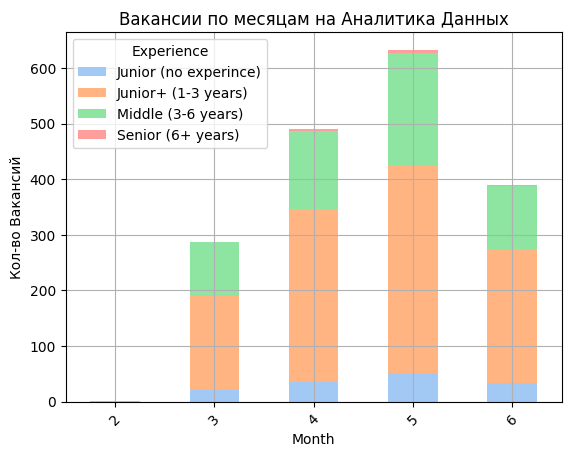

In [142]:
# Подсчет количества вакансий по месяцам и грейдам
pivot_table = vacancies_da.pivot_table(index='month', columns='experience', aggfunc='size', fill_value=0)

# Построение гистограммы
pivot_table.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))
plt.xlabel("Month")
plt.ylabel("Кол-во Вакансий")
plt.title("Вакансии по месяцам на Аналитика Данных")
plt.xticks(rotation=45)
plt.legend(title='Experience')
plt.grid(True)

# Показ гистограммы
plt.show()

Наибольшее количество вакансий было размещено в мае. Среди всех вакансий больще всего на позиции уровня Junior+, за которыми следуют позиции уровня Middle. Вакансий для начинающих (Junior) оказалось наименьшее количество. Пропорции между этими категориями оставались практически неизменными каждый месяц.

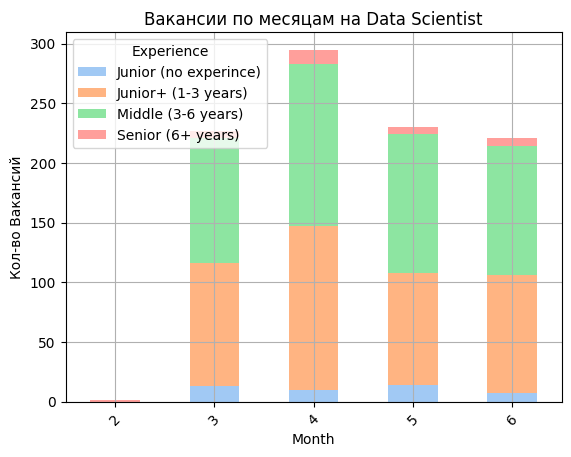

In [143]:
# Подсчет количества вакансий по месяцам и грейдам
pivot_table = vacancies_ds.pivot_table(index='month', columns='experience', aggfunc='size', fill_value=0)

# Построение гистограммы
pivot_table.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))
plt.xlabel("Month")
plt.ylabel("Кол-во Вакансий")
plt.title("Вакансии по месяцам на Data Scientist")
plt.xticks(rotation=45)
plt.legend(title='Experience')
plt.grid(True)

# Показ гистограммы
plt.show()

В марте, мае и июне количество вакансий оставалось примерно на одном уровне.

Апрель выделяется значительно увеличенным числом размещённых вакансий.

Пеобладающая доля составляют позиции для специалистов уровней миддл и джуниор +. Причём распределение практически равномерныое.

### 9. Выводы и рекомендации



1. Аналитики данных:
   - Уровень Junior+ наиболее востребован (60% вакансий), затем следует уровень Middle (30%).
   - Компании часто ищут сотрудников с начальными умениями и некоторым опытом работы.

2. Дата-саентисты:
   - Уровни Junior+ и Middle имеют примерно одинаковую востребованность (44% и 47% соответственно).
   - Средний уровень опыта пользуется спросомв данной категории.

**ТОП работодателей:**
- Сбербанк, Wildberries, Ozon, ВТБ, T1, Магнит, МТС, Okko, ЦБ и Яндекс:
  - Компании привлекают специалистов различного уровня.

Сбербанк:
- Здесь наиболее востребован уровень Junior+, а затем уровень Middle.
- Есть вакансии для кандидатов без опыта работы (студенты, молодые специалисты).

Компании с преобладанием уровня Middle:
- Яндекс, Т1, Wildberries:
  - Данные компании нуждаются в специалистах, готовых сразу приступить к выполнению сложных задач.

Компании с приоритетом на Junior+:
- Центральный банк, МТС, Магнит, ВТБ, Okko:
  - Компании ориентированы на сотрудников с базовыми навыками.

**Уровень зарплат:**
- Зарплаты Data Scientist выше, чем у Data Analyst на всех уровнях опыта.
  - Разница в доходах значительна на высоких позициях.

**Занятость:**
- Более 97% вакансий предполагают полную занятость.

**Важные навыки:**
- Для аналитиков данных: SQL, Python, работа с базами данных, Power BI, аналитическое мышление.
- Для Data Scientists: Python, SQL, Pandas, машинное обучение, документация, коммуникация.

**Рекомендации для соискателей:**
1. Определитесь с уровнем опыта:
   - Если вы Junior+ или Middle, у вас больше вщансов на рынке труда.
   - Ориентация на Hard Skills, таких как SQL и Python.

2. Рассмотрите крупные компании для старта:
   - Сбербанк, Wildberries, Ozon и другие большие организации предлагают много вакансий, особенно на уровне Junior+.

5. Заработная плата:
   - Цельтесь на роли Data Scientist, если хотите большую зарплату на старших позициях.